# Learning Curves

👇 Load the dataset `insurance_charges.csv` from the `data` folder into a dataframe. Display the 5 first rows.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
client_df = pd.read_csv('data/insurance_charges.csv')
client_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,True,southwest,16884.92400
1,18,male,33.770,1,False,southeast,1725.55230
2,28,male,33.000,3,False,southeast,4449.46200
3,33,male,22.705,0,False,northwest,21984.47061
4,32,male,28.880,0,False,northwest,3866.85520


The task is to predict the amount paid by a client according to its profile.

## 1. Modelling

👇 Train and score a linear regression model using **bmi, age, children and smoker** to predict the **charges**. Don't forget to Holdout!

[Sklearn `LinearRegression` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Prepare X and y
features = ['bmi', 'age', 'children', 'smoker']
target_name = 'charges'
# Split into Train/Test
X = client_df[features]
y = client_df[target_name]

# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 4)
# Instanciate the model
model = LinearRegression()
# Train the model on the Training data
model.fit(X_train, y_train)
# Score the model on the Testing data
model.score(X_test, y_test)

0.7642739307002332

You should be getting a decent score!! Let's visualize the Learning Curves to assess the model performance.

## 2. Learning Curves

👇 Plot the Learning Curves of your model.

In [25]:
# Split into Train/Test
data_train, data_test = train_test_split(client_df, test_size=0.3, random_state = 3)
# Prepare the test data
X_test = data_test[features]
y_test = data_test[target_name]

# Create empty dataframe to store scores
learning_curves_elements = pd.DataFrame(columns=['train_score', 'test_score', 'train_size'])
# Train sizes to loop over
train_sizes = [50,100,200,300,400,500,600, 700, 800, 900]
    
for size in train_sizes:
    # Sample the training set
    data_train_sample = data_train.sample(size, random_state = 3)
    # Prepare X and y
    X_train = data_train_sample[features]
    y_train = data_train_sample[target_name]
    # Train the model on the sampled Train data
    model.fit(X_train, y_train)
    # Score the model on the train data (sampled) and test data (fixed)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    # Append associated train score, test score, and train size to dataframe
    learning_curves_elements = learning_curves_elements.append(\
                            {'train_score' : train_score, 'test_score': test_score, 'train_size': size},\
                                                              ignore_index=True)
    

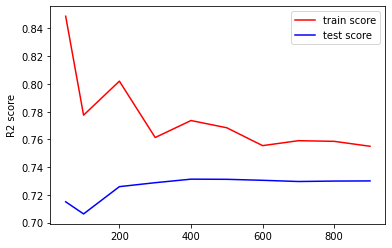

In [26]:
plt.plot(learning_curves_elements.train_size,learning_curves_elements.train_score,  color = 'red', label='train score')
plt.plot(learning_curves_elements.train_size,learning_curves_elements.test_score, color = 'blue', label='test score')
plt.ylabel('R2 score')
plt.legend()

❓ What do you deduce from your learning curves?

Good performance, not overfit, our model explains 75% of the variance of the charges

❓ How would you go about increasing model performance?

Use remaining features

## 3. Predictions

❓ According to your model, how much would a 24 year old smoking man with no children and a bmi of 22 expect to pay to be insured?

In [29]:
model.predict([[22, 24, 0, True]])

array([24822.27266918])

⚠️ Please, push the exercice once you have completed it 🙃

# 🏁